In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))



['travel insurance.csv']


In [2]:
travel = pd.read_csv("../input/travel insurance.csv", delimiter=",")
travel.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


Checking for Null values (can see some in Gender)

In [3]:
print(travel['Gender'].value_counts())

print(travel.isnull().any())

print(travel['Gender'].isnull().sum())

M    9347
F    8872
Name: Gender, dtype: int64
Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
dtype: bool
45107


In [4]:
travel = travel.dropna()

# check again...

print(travel['Gender'].any() == np.nan)

False


Checking the data in the 'Age' column

In [5]:
travel['Age'].describe()

# Drop the max age of 118 since there is no one on Earth that old...

count    18219.000000
mean        44.785444
std         20.894323
min          0.000000
25%         31.000000
50%         40.000000
75%         52.000000
max        118.000000
Name: Age, dtype: float64

In [6]:
travel = travel[travel.Age != 118]

Checking the data in the 'Duration' column

In [7]:
travel['Duration'].describe()
# will remove the instance of 0 Duration

count    17378.000000
mean        70.628784
std        115.088822
min          0.000000
25%          9.000000
50%         21.000000
75%         59.000000
max        740.000000
Name: Duration, dtype: float64

In [8]:
travel = travel[travel.Duration != 0]

### Some Visualizations... ###

In [9]:
print(travel['Duration'].any() == 0)

## What about the number of claims approved, and/or what can we say about our target variable?

travel['Claim'].value_counts()

False


No     16727
Yes      633
Name: Claim, dtype: int64

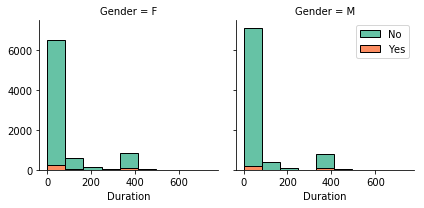

In [10]:
import seaborn as sns

bins = np.linspace(travel.Duration.min(), travel.Duration.max(), 10)
g = sns.FacetGrid(travel, col="Gender", hue="Claim", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Duration', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

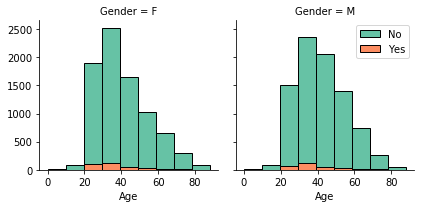

In [11]:
bins = np.linspace(travel.Age.min(), travel.Age.max(),10)
g = sns.FacetGrid(travel, col='Gender',hue='Claim', palette='Set2', col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec='k')

g.axes[-1].legend()
plt.show()

### Pre-Processing ###

In [12]:
travel.groupby(['Gender'])['Claim'].value_counts(normalize=True)
travel['Gender'].replace(to_replace=['F','M'], value=[0,1],inplace=True)

In [13]:
Feature = travel[['Duration', 'Distribution Channel', 'Net Sales',  'Age', 'Gender']]
Feature = pd.concat([Feature,pd.get_dummies(travel['Distribution Channel'])], axis=1)

In [14]:
Feature.head()

,Duration,Distribution Channel,Net Sales,Age,Gender,Offline,Online
0,186,Offline,-29.0,81,0,1,0
1,186,Offline,-29.0,71,0,1,0
5,66,Online,-121.0,44,0,0,1
11,1,Online,-18.0,47,1,0,1
12,53,Online,-130.0,48,0,0,1


In [15]:
X = Feature[['Duration', 'Net Sales', 'Age', 'Gender', 'Offline','Online']]

In [16]:
X.head()

,Duration,Net Sales,Age,Gender,Offline,Online
0,186,-29.0,81,0,1,0
1,186,-29.0,71,0,1,0
5,66,-121.0,44,0,0,1
11,1,-18.0,47,1,0,1
12,53,-130.0,48,0,0,1


In [17]:
y = travel['Claim']
y = travel['Claim'].replace(to_replace=['Yes','No'], value=[0,1]).values
y[0:5]

array([1, 1, 1, 1, 1])

In [18]:
# now use train/split to split data
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [19]:
print(X_trainset.shape)
print(y_trainset.shape)

print(X_testset.shape)
print(y_testset.shape)

(12152, 6)
(12152,)
(5208, 6)
(5208,)


In [20]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.00152281, -1.15776812,  2.91706008, -1.01240411,  4.1173329 ,
        -4.1173329 ],
       [ 1.00152281, -1.15776812,  2.18326591, -1.01240411,  4.1173329 ,
        -4.1173329 ],
       [-0.04084353, -2.38453346,  0.20202165, -1.01240411, -0.24287567,
         0.24287567],
       [-0.60545863, -1.01108965,  0.4221599 ,  0.98774786, -0.24287567,
         0.24287567],
       [-0.15376655, -2.50454312,  0.49553932, -1.01240411, -0.24287567,
         0.24287567]])

In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
yhat=LR.predict(X_trainset)
y_proba=LR.predict_proba(X_trainset)


In [22]:
from sklearn.metrics import jaccard_similarity_score

print(jaccard_similarity_score(y_trainset, yhat))

0.9640388413429888


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
